In [68]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

In [69]:
#afisam data setul ecommerce
df = pd.read_csv('Wholesale customers data.csv')
df

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185
...,...,...,...,...,...,...,...,...
435,1,3,29703,12051,16027,13135,182,2204
436,1,3,39228,1431,764,4510,93,2346
437,2,3,14531,15488,30243,437,14841,1867
438,1,3,10290,1981,2232,1038,168,2125


In [70]:
#informatii despre coloane
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


In [71]:
# stergem, scoatem coloanele care nu ne trebuie
# am scos email si address
df = df.drop(['Channel', 'Region'], axis=1)

In [72]:
df

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,12669,9656,7561,214,2674,1338
1,7057,9810,9568,1762,3293,1776
2,6353,8808,7684,2405,3516,7844
3,13265,1196,4221,6404,507,1788
4,22615,5410,7198,3915,1777,5185
...,...,...,...,...,...,...
435,29703,12051,16027,13135,182,2204
436,39228,1431,764,4510,93,2346
437,14531,15488,30243,437,14841,1867
438,10290,1981,2232,1038,168,2125


In [73]:
# scoatem matricea X
X = df.values

In [74]:
X

array([[12669,  9656,  7561,   214,  2674,  1338],
       [ 7057,  9810,  9568,  1762,  3293,  1776],
       [ 6353,  8808,  7684,  2405,  3516,  7844],
       ...,
       [14531, 15488, 30243,   437, 14841,  1867],
       [10290,  1981,  2232,  1038,   168,  2125],
       [ 2787,  1698,  2510,    65,   477,    52]], dtype=int64)

In [75]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

In [76]:
#verificam timpul de rulare
kmeans_random = KMeans(init='random')
kmeans_plut_plus = KMeans()

In [77]:
%%timeit -n 1 -r 1
kmeans_random.fit(X)

116 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


In [78]:
%%timeit -n 1 -r 1
kmeans_plut_plus.fit(X)

119 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


In [79]:
# sa gasim nr optimal de clustere
# creem o lista goala unde vom pastra scorurile noatre
scores = []
for k in range(2,11):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    y_pred = kmeans.predict(X)
    score = silhouette_score(X, y_pred)
    scores.append(score)

In [80]:
scores

[0.5115333898779053,
 0.4783511430782059,
 0.383260475129267,
 0.3690214841962619,
 0.3785832029935031,
 0.34339688043466493,
 0.343500901507773,
 0.3123857913532912,
 0.2976281340395231]

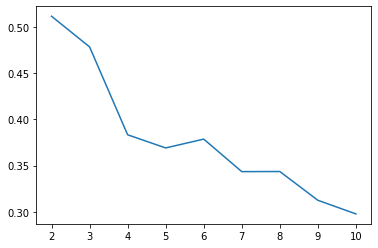

In [81]:
#grafic pentru scor
# alegem ca mai inalta valoare adika 5 de la cel mai sus
plt.plot(range(2,11), scores)

In [82]:
kmeans = KMeans(n_clusters=5)

In [83]:
kmeans.fit(X)

KMeans(n_clusters=5)

In [84]:
# afisam vectorii medii cu kmeans
kmeans.cluster_centers_

array([[21200.05769231,  3886.42307692,  5138.93269231,  4119.85576923,
         1131.51923077,  1690.33653846],
       [ 6028.50220264,  3359.02643172,  4206.82819383,  2435.84140969,
         1279.52863436,  1004.77092511],
       [ 5076.65384615, 12288.52564103, 18814.52564103,  1605.        ,
         8254.3974359 ,  1830.51282051],
       [20031.28571429, 38084.        , 56126.14285714,  2564.57142857,
        27644.57142857,  2548.14285714],
       [48777.375     ,  6607.375     ,  6197.79166667,  9462.79166667,
          932.125     ,  4435.33333333]])

In [85]:
# facem ca un tabel, analiza prescriptiva
clusters_table = pd.DataFrame(kmeans.cluster_centers_, columns=df.columns)

In [86]:
clusters_table

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,21200.057692,3886.423077,5138.932692,4119.855769,1131.519231,1690.336538
1,6028.502203,3359.026432,4206.828194,2435.841410,1279.528634,1004.770925
2,5076.653846,12288.525641,18814.525641,1605.000000,8254.397436,1830.512821
3,20031.285714,38084.000000,56126.142857,2564.571429,27644.571429,2548.142857
4,48777.375000,6607.375000,6197.791667,9462.791667,932.125000,4435.333333


In [87]:
X = df[['Fresh','Milk', 'Grocery','Detergents_Paper']].values

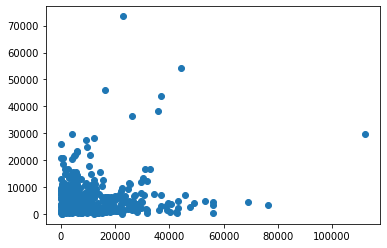

In [88]:
#graficul simplu
plt.scatter(X[:, 0], X[:, 1])

In [89]:
kmeans = KMeans(n_clusters=5)
cluster = kmeans.fit_predict(X)

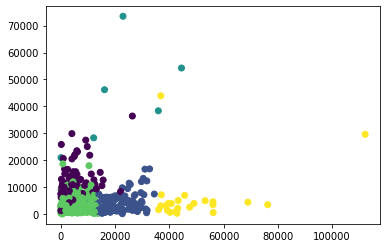

In [90]:
#graficul la kmeans
plt.scatter(X[:, 0], X[:, 1], c = cluster)

In [91]:
# importam gmm
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components=5)

In [92]:
cluster = gmm.fit_predict(X)

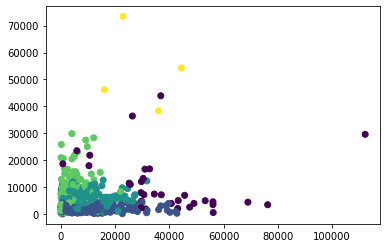

In [93]:
#graficul la gmm
plt.scatter(X[:, 0], X[:, 1], c = cluster)

In [94]:
# facem interpretarea
from matplotlib.patches import Ellipse

def draw_ellipse(position, covariances, ax=None, **kwargs):
    """Draw an ellipse with a given position and covariance"""
    ax = ax or plt.gca()
    
    # Convert covariance to principal axes
    if covariances.shape == (2, 2):
        U, s, Vt = np.linalg.svd(covariances)
        angle = np.degrees(np.arctan2(U[1, 0], U[0, 0]))
        width, height = 2 * np.sqrt(s)
    else:
        angle = 0
        width, height = 2 * np.sqrt(covariances)
    
    # Draw the Ellipse
    for nsig in range(1, 4):
        ax.add_patch(Ellipse(position, nsig * width, nsig * height,
                             angle, **kwargs))
        
def plot_gmm(gmm, X, label=True, ax=None):
    ax = ax or plt.gca()
    labels = gmm.fit(X).predict(X)
    if label:
        ax.scatter(X[:, 0], X[:, 1], c=labels, s=40, cmap='viridis', zorder=2)
    else:
        ax.scatter(X[:, 0], X[:, 1], s=40, zorder=2)

    
    w_factor = 0.2 / gmm.weights_.max()
    for pos, covariances, w in zip(gmm.means_, gmm.covariances_, gmm.weights_):
        draw_ellipse(pos, covariances, alpha=w * w_factor)

c:\users\mecc\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in sqrt
  from ipykernel import kernelapp as app


ValueError: too many values to unpack (expected 2)

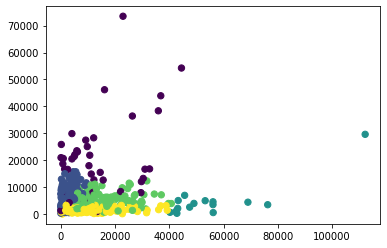

In [95]:
plot_gmm(gmm, X, label=True)